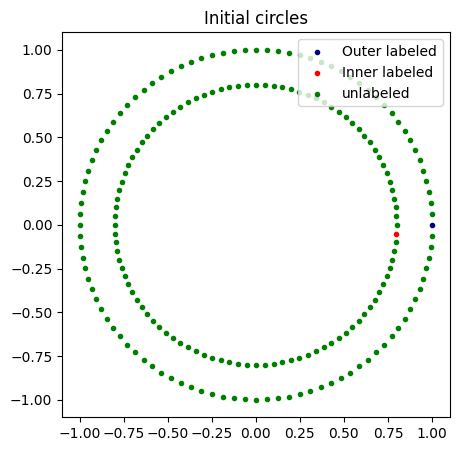

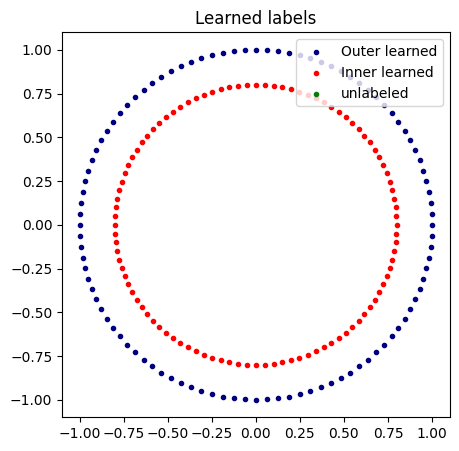

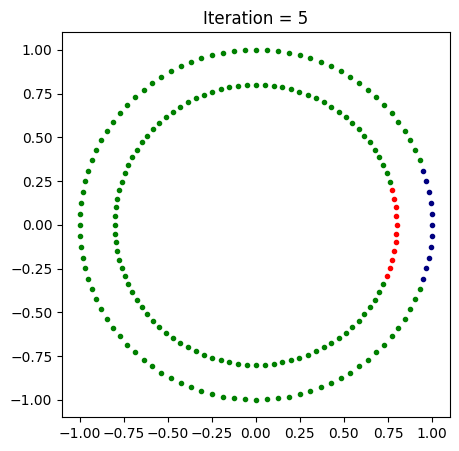

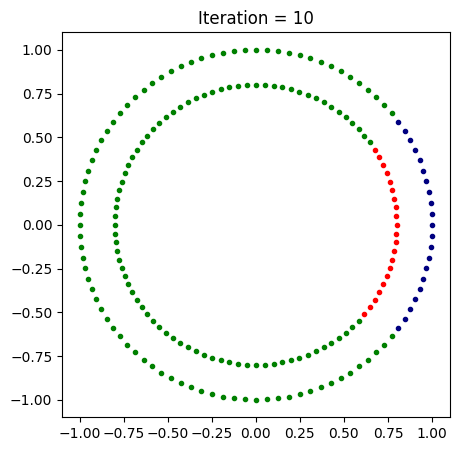

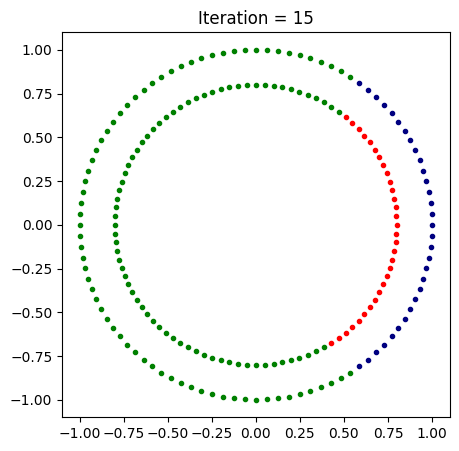

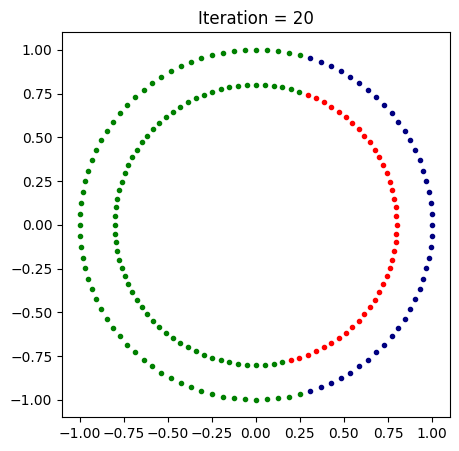

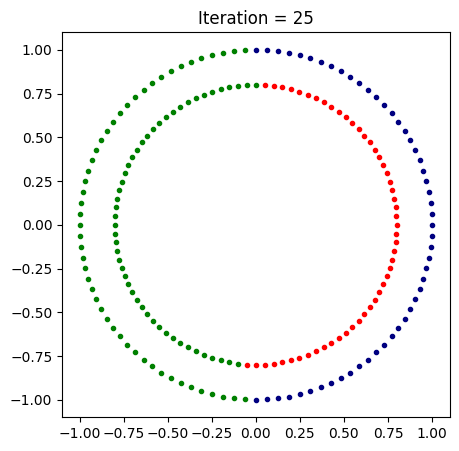

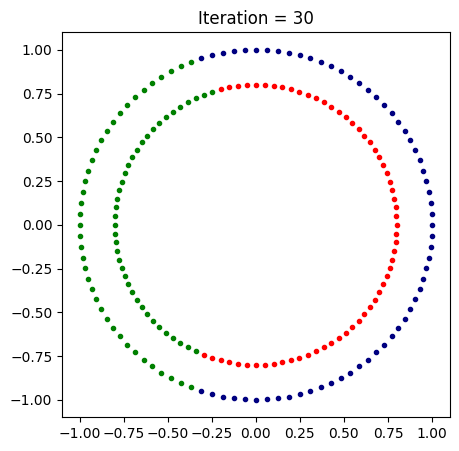

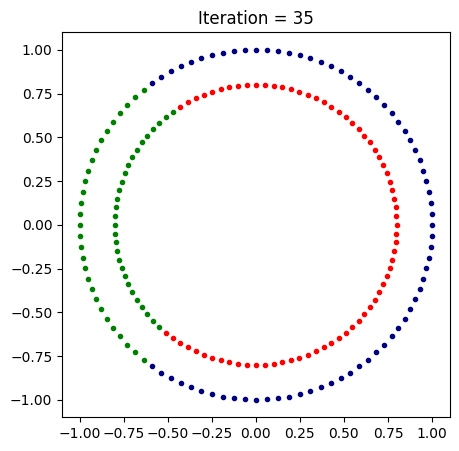

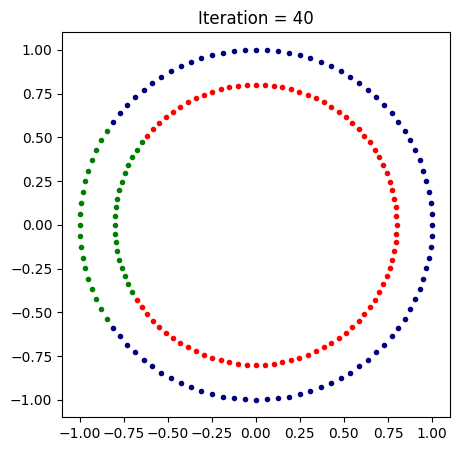

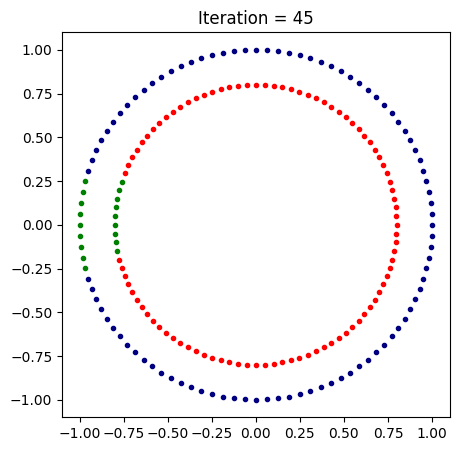

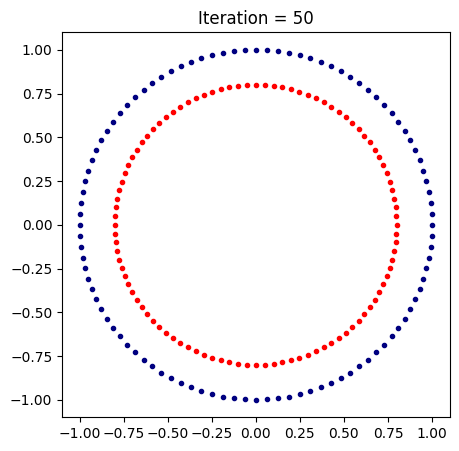

In [2]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

# Generate two circles dataset
num_samples = 200
X, y = make_circles(n_samples=num_samples, shuffle=False)
class_outer, class_inner = 0, 1
labels = np.full(num_samples, -1.0)
labels[0] = class_outer
labels[-1] = class_inner

# Plot initial circles
def plot_scatter(data, target_labels, outer_class, inner_class, title="", outer_title="", inner_title="", legend=True):
    plt.figure(figsize=(5, 5))
    plt.scatter(data[target_labels == outer_class, 0], data[target_labels == outer_class, 1], color="navy", marker=".", label=outer_title)
    plt.scatter(data[target_labels == inner_class, 0], data[target_labels == inner_class, 1], color="red", marker=".", label=inner_title)
    plt.scatter(data[target_labels == -1, 0], data[target_labels == -1, 1], color="green", marker=".", label="unlabeled")
    if legend:
        plt.legend(scatterpoints=1, shadow=False, loc="upper right")
    plt.title(title)
    plt.show()

plot_scatter(X, labels, class_outer, class_inner, title="Initial circles", outer_title="Outer labeled", inner_title="Inner labeled")

# Implement Label Spreading algorithm
def label_spreading(data, target_labels, alpha=0.8, tolerance=0.001, max_iterations=300):
    graph_matrix = kneighbors_graph(data, 3, mode='connectivity', include_self=True)
    classes = np.array([0, 1])
    Y1 = np.zeros((len(target_labels), len(classes)))
    for label in classes:
        Y1[target_labels == label, classes == label] = 1
    Y0 = np.copy(Y1) * (1 - alpha)
    Y_previous = np.zeros((data.shape[0], len(classes)))
    for _ in range(max_iterations):
        if np.abs(Y1 - Y_previous).sum() < tolerance:
            break
        Y_previous = Y1
        Y1 = graph_matrix @ Y1
        Y1 = alpha * Y1 + Y0
    out_labels = np.zeros(Y1.shape[0])
    for i in range(Y1.shape[0]):
        if Y1[i, 0] == 0 and Y1[i, 1] == 0:
            out_labels[i] = -1
        else:
            out_labels[i] = classes[np.argmax(Y1[i])]
    return out_labels

# Apply Label Spreading and plot results
output_labels = label_spreading(X, labels, max_iterations=100)
plot_scatter(X, output_labels, class_outer, class_inner, title="Learned labels", outer_title="Outer learned", inner_title="Inner learned")

# Plot learning progress for iterations
for i in range(5, 51, 5):
    plot_scatter(X, label_spreading(X, labels, max_iterations=i), class_outer, class_inner, title="Iteration = " + str(i), legend=False)


**Conclusion:**

The analysis demonstrates the accurate propagation of labels, revealing successful convergence of the model after 50 iterations.